![image info](https://ineuron.ai/images/ineuron-logo.png)

# Data Pre-Processing

#### Import Packages and CSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", None)

In [2]:
dataset_path = './data/chronic_kidney_disease.arff'
colNames =['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot',
            'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class']

df = pd.read_csv(dataset_path, names=colNames, sep=',', header=None, index_col=False, skiprows= 29, na_values=['?'], skipinitialspace=True, usecols=range(0, 25))

## Data Cleaning

### Check Spelling Errors

* Spelling Error in `class` column

In [3]:
df['class'].value_counts(normalize=True)

ckd       0.6250
notckd    0.3725
no        0.0025
Name: class, dtype: float64

* Spelling Error in `appet` column

In [4]:
df['appet'].value_counts()

good    316
poor     82
no        1
Name: appet, dtype: int64

* Spelling Error in `pe` column

In [5]:
df['pe'].value_counts()

no      322
yes      76
good      1
Name: pe, dtype: int64

### Handling spelling errors

In [6]:
df['class'].mask(df['class'] == 'no', 'notckd', inplace=True)
df['appet'].mask(df['appet']=='no','poor', inplace=True)
df['pe'].mask(df['pe']=='good','yes', inplace=True)

### Handling Missing values

* Handling Missing values 
* Handling Duplicates
* Check data type
* Understand the dataset

#### Check Null Values

In [7]:
##these are the features with nan value
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
print('Missing values of each column')
for feature in features_with_na:
    print(feature,':',np.round(df[feature].isnull().mean()*100,5),'%')

Missing values of each column
age : 2.25 %
bp : 3.0 %
sg : 11.75 %
al : 11.5 %
su : 12.25 %
rbc : 38.0 %
pc : 16.25 %
pcc : 1.0 %
ba : 1.0 %
bgr : 11.0 %
bu : 4.75 %
sc : 4.25 %
sod : 21.75 %
pot : 22.0 %
hemo : 13.0 %
pcv : 17.75 %
wbcc : 26.5 %
rbcc : 32.75 %
htn : 0.5 %
dm : 0.75 %
cad : 0.5 %
appet : 0.25 %
pe : 0.25 %
ane : 0.25 %


**What does NaN mean?**

**Ans:** Missing Values in a DataFrame

**Why might a value be missing?** 

**Ans:** When considering the potential impact of the missing data on the Dataset, it is important to consider the underlying reasons for why the data are missing
Missing data are of three categories:
* Missing completely at random (MCAR)
* Missing at random (MAR).
* Missing not at random (MNAR). 

Here it is MAR type of missing values in dataset which are Missing at Random. That maybe caused by instrument availability and instrument not able to record at the time of capturing.

## KNN Imputer can be used for handling Null values

* As KNN imputer uses Euclidean distance. We can transform the data and use imputer to fill null values.

In [9]:
# statistics on numerical columns (Null cols)
df[features_with_na].select_dtypes(exclude='object').describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


### 3.2 Other Data Cleaning steps

**Handling Duplicates**

In [10]:
df.duplicated().sum()

0

* **There are no duplicates in the dataset**

# Feature Engineering

### Type of Features

**Numeric Features**

In [11]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 14


**Categorical Features**

In [12]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 11


**Discrete Features**

In [13]:
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))

Num of Discrete Features : 4


**Continues Features**

In [14]:
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Continuous Features : 10


### Check Outlier and Capping it

**Why outliers?**
* Data Entry error : Human error. 
* Measurement error: Instrument error. 
* Natural error: it will be Real life data.
* Intentional error: People give wrong inputs

**Impact of Outliers ?**
* Ouliers can very high impact on few Machine learning models.
* Can Cause bias in the output.

**Why IQR For Outlier Handling?**
* For Skewed distributions: Use Inter-Quartile Range (IQR) proximity rule.
* The data points which fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are outliers.

* where Q1 and Q3 are the 25th and 75th percentile of the dataset respectively, and IQR represents the inter-quartile range and given by Q3 – Q1.

In [16]:
continuous_features

['age', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']

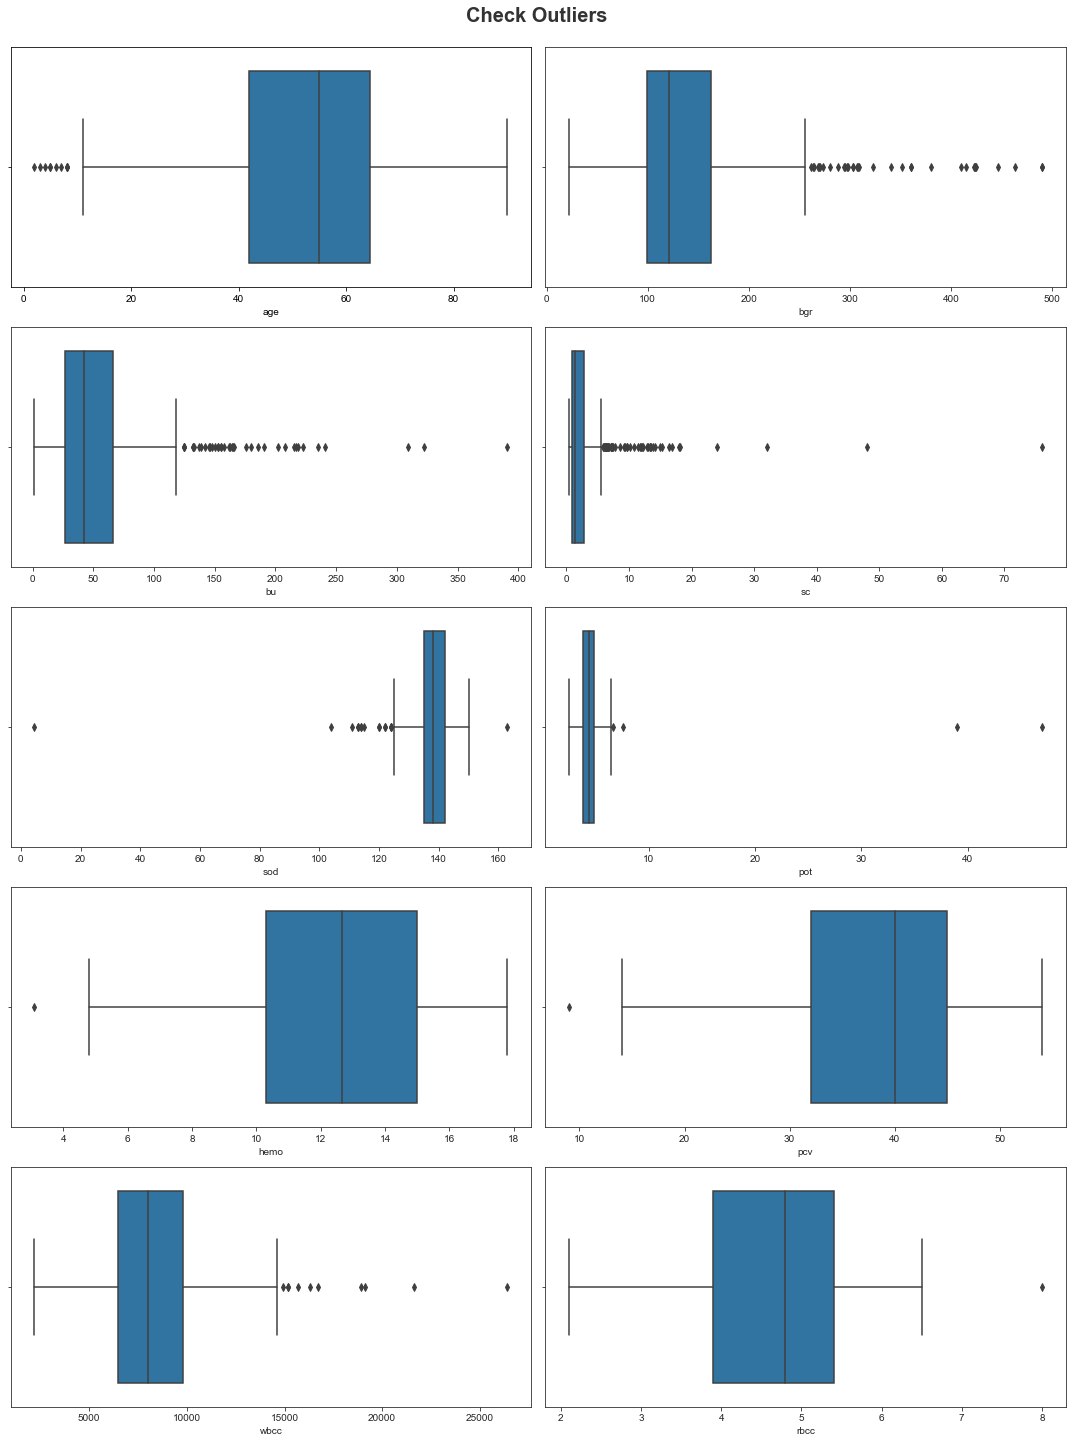

In [17]:
plt.figure(figsize=(15, 20))
plt.suptitle('Check Outliers', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(continuous_features)):
    plt.subplot(5, 2, i+1)
    sns.set_style('ticks')
    sns.boxplot(df[continuous_features[i]])
    plt.tight_layout()

**Report**
* As per the Chart we can see there are some outliers in almost every column
* Handle outliers using IQR method.

**Detecting Outlier and Capping it**

In [18]:
def detect_outliers(col):
    # Finding the IQR
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    print('\n ####', col , '####')
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit.round(2))
    print("Lower limit",lower_limit.round(2))
    df.loc[(df[col]>upper_limit), col]= upper_limit
    df.loc[(df[col]<lower_limit), col]= lower_limit    
    return df

**Why are we capping it and why not trim it ?**
* Trimming outliers may result in the removal of a large number of records from this dataset as we have already very less rows so this isn’t desirable in this case since columns other than the ones containing the outlier values may contain useful information.

* In this cases, you can use outlier capping to replace the outlier values with a maximum or minimum capped values. Be warned, this manipulates our data but we can replace outlier values by the upper and lower limit calculated using the IQR range.

In [19]:
for col in continuous_features:
         detect_outliers(col)


 #### age ####
percentile25 42.0
percentile75 64.5
Upper limit 98.25
Lower limit 8.25

 #### bgr ####
percentile25 99.0
percentile75 163.0
Upper limit 259.0
Lower limit 3.0

 #### bu ####
percentile25 27.0
percentile75 66.0
Upper limit 124.5
Lower limit -31.5

 #### sc ####
percentile25 0.9
percentile75 2.8
Upper limit 5.65
Lower limit -1.95

 #### sod ####
percentile25 135.0
percentile75 142.0
Upper limit 152.5
Lower limit 124.5

 #### pot ####
percentile25 3.8
percentile75 4.9
Upper limit 6.55
Lower limit 2.15

 #### hemo ####
percentile25 10.3
percentile75 15.0
Upper limit 22.05
Lower limit 3.25

 #### pcv ####
percentile25 32.0
percentile75 45.0
Upper limit 64.5
Lower limit 12.5

 #### wbcc ####
percentile25 6500.0
percentile75 9800.0
Upper limit 14750.0
Lower limit 1550.0

 #### rbcc ####
percentile25 3.9
percentile75 5.4
Upper limit 7.65
Lower limit 1.65


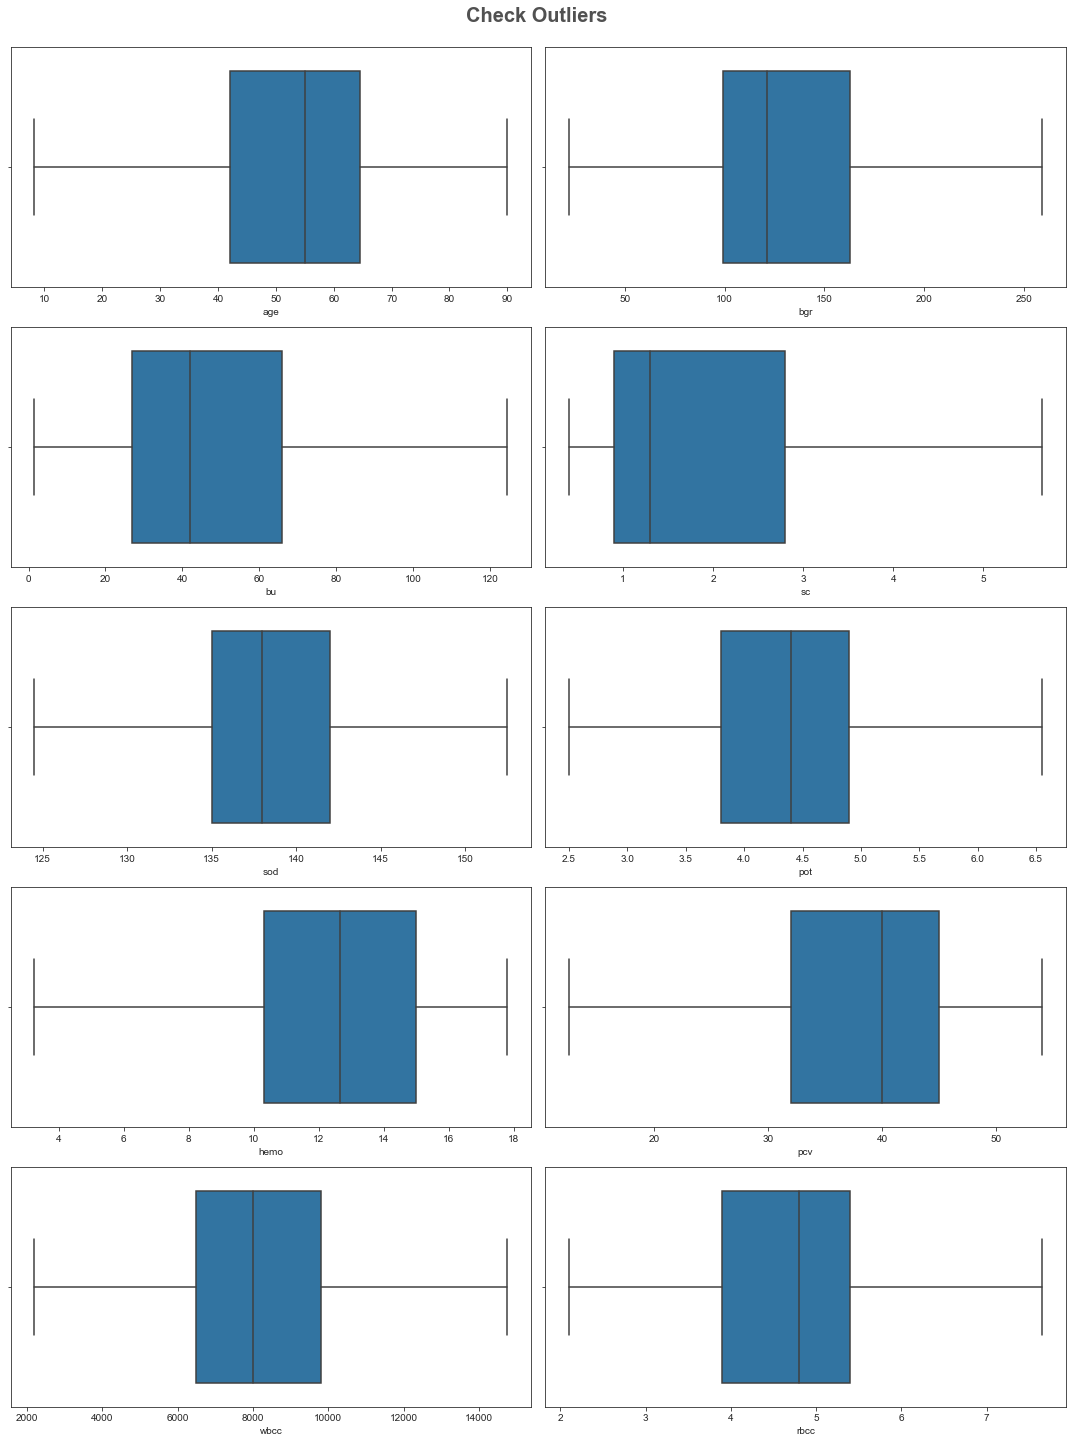

In [20]:
plt.figure(figsize=(15, 20))
plt.suptitle('Check Outliers', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(continuous_features)):
    plt.subplot(5, 2, i+1)
    sns.set_style('ticks')
    sns.boxplot(df[continuous_features[i]])
    plt.tight_layout()

**Checking Skewness after Outlier Capping**

In [21]:
df[continuous_features].skew(axis=0, skipna=True)

age    -0.615760
bgr     1.022962
bu      1.078868
sc      1.153813
sod    -0.183473
pot     0.383004
hemo   -0.331398
pcv    -0.406615
wbcc    0.495374
rbcc   -0.217677
dtype: float64

* A skewness value greater than 1 or less than -1 indicates a highly skewed distribution. A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.

## Feature Encoding and Scaling

In [22]:
cat_features

['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class']

In [24]:
from sklearn.preprocessing import OrdinalEncoder
df1 = df.copy()
features = df1[cat_features]
enc = OrdinalEncoder().fit(features.values)
features = enc.transform(features.values)
df1[cat_features] = features
df1 = pd.DataFrame(df1, columns=df1.columns)

### Split X and Y

* **Split Dataframe to X and y**
* **Here we set a variable X i.e, independent columns, and a variable y i.e, dependent column as the “class” column.**


In [25]:
X = df1.drop(['class'], axis=1)
y = df1['class']

In [26]:
X

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,48.00,80.0,1.020,1.0,0.0,NaN,1.0,0.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,1.0,1.0,0.0,0.0,0.0,0.0
1,8.25,50.0,1.020,4.0,0.0,NaN,1.0,0.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,62.00,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,259.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,0.0,1.0,0.0,1.0,0.0,1.0
3,48.00,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,56.0,3.8,124.5,2.5,11.2,32.0,6700.0,3.9,1.0,0.0,0.0,1.0,1.0,1.0
4,51.00,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.00,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,0.0,0.0,0.0,0.0,0.0,0.0
396,42.00,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,0.0,0.0,0.0,0.0,0.0,0.0
397,12.00,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,0.0,0.0,0.0,0.0,0.0,0.0
398,17.00,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,0.0,0.0,0.0,0.0,0.0,0.0


## Feature Transformation

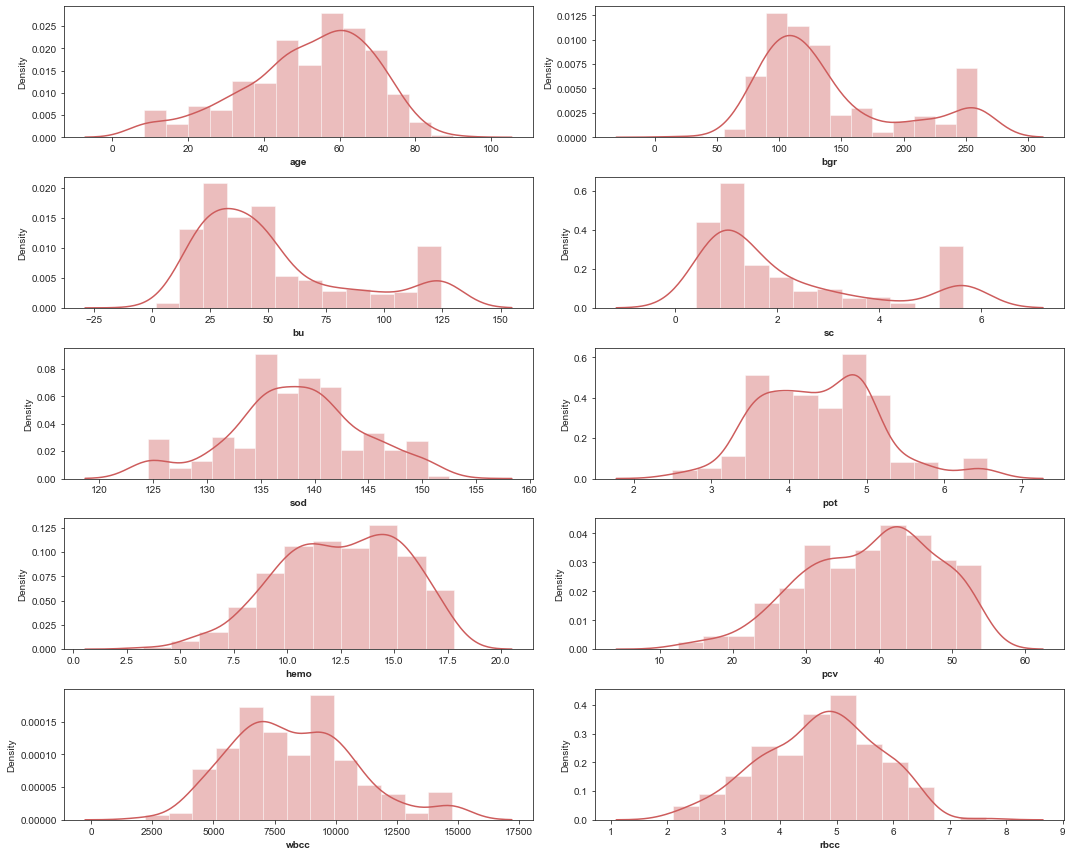

In [27]:
# distribution of data before scaling
plt.figure(figsize=(15, 12))
for i, col in enumerate(continuous_features):
    plt.subplot(5, 2, i+1)
    sns.distplot(x=X[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

- Positiviely Skewed : sc (Serum Creatinine), bgr (Blood Glucose Random), bu (Blood Urea)
- Negatively Skewed : Age

**Log Transformation**

**What is Skewness ?**

* Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed. Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution. A normal distribution has a skew of zero

In [28]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# transform data
X_scaled = X.copy()
features = X_scaled[num_features]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X_scaled[num_features] = features
X_scaled = pd.DataFrame(X_scaled, columns=X.columns) # Save X_scaled as DataFrame for visualization

**Check the Scaled dataframe**

In [29]:
X_scaled

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,-0.209293,0.258373,0.454071,-0.012548,-0.410106,NaN,1.0,0.0,0.0,-0.332580,-0.474727,-0.545085,NaN,NaN,0.988345,0.570821,-0.195045,0.484447,1.0,1.0,0.0,0.0,0.0,0.0
1,-2.552022,-1.936857,0.454071,2.208413,-0.410106,NaN,1.0,0.0,0.0,NaN,-1.016780,-0.779196,NaN,NaN,-0.422037,-0.100093,-0.903474,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,0.615820,0.258373,-1.297699,0.727772,2.323069,1.0,1.0,0.0,0.0,2.086577,0.037212,-0.193920,NaN,NaN,-1.006830,-0.882827,-0.313117,NaN,0.0,1.0,0.0,1.0,0.0,1.0
3,-0.209293,-0.473370,-2.173584,2.208413,-0.410106,1.0,0.0,1.0,0.0,-0.402700,0.127554,0.976630,-2.233321,-2.487769,-0.456437,-0.771008,-0.627974,-0.790759,1.0,0.0,0.0,1.0,1.0,1.0
4,-0.032483,0.258373,-1.297699,0.727772,-0.410106,1.0,1.0,0.0,0.0,-0.595532,-0.775868,-0.428030,NaN,NaN,-0.318839,-0.435550,-0.391831,-0.104110,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.203263,0.258373,0.454071,-0.752868,-0.410106,1.0,1.0,0.0,0.0,0.000492,-0.083244,-0.954778,1.921265,0.671196,1.091544,0.906278,-0.627974,0.190169,0.0,0.0,0.0,0.0,0.0,0.0
396,-0.562912,-0.473370,1.329955,-0.752868,-0.410106,1.0,1.0,0.0,0.0,-1.138965,-0.625297,-0.545085,0.454941,-1.171534,1.366741,1.689011,-0.195045,1.465374,0.0,0.0,0.0,0.0,0.0,0.0
397,-2.331010,0.258373,0.454071,-0.752868,-0.410106,1.0,1.0,0.0,0.0,-0.700712,-0.775868,-0.896251,-0.196759,0.013078,1.125944,1.129916,-0.667331,0.680632,0.0,0.0,0.0,0.0,0.0,0.0
398,-2.036327,-1.205114,1.329955,-0.752868,-0.410106,1.0,1.0,0.0,0.0,-0.455291,-0.053130,-0.662140,-0.522609,0.671196,0.575550,1.353554,-0.431188,1.171096,0.0,0.0,0.0,0.0,0.0,0.0


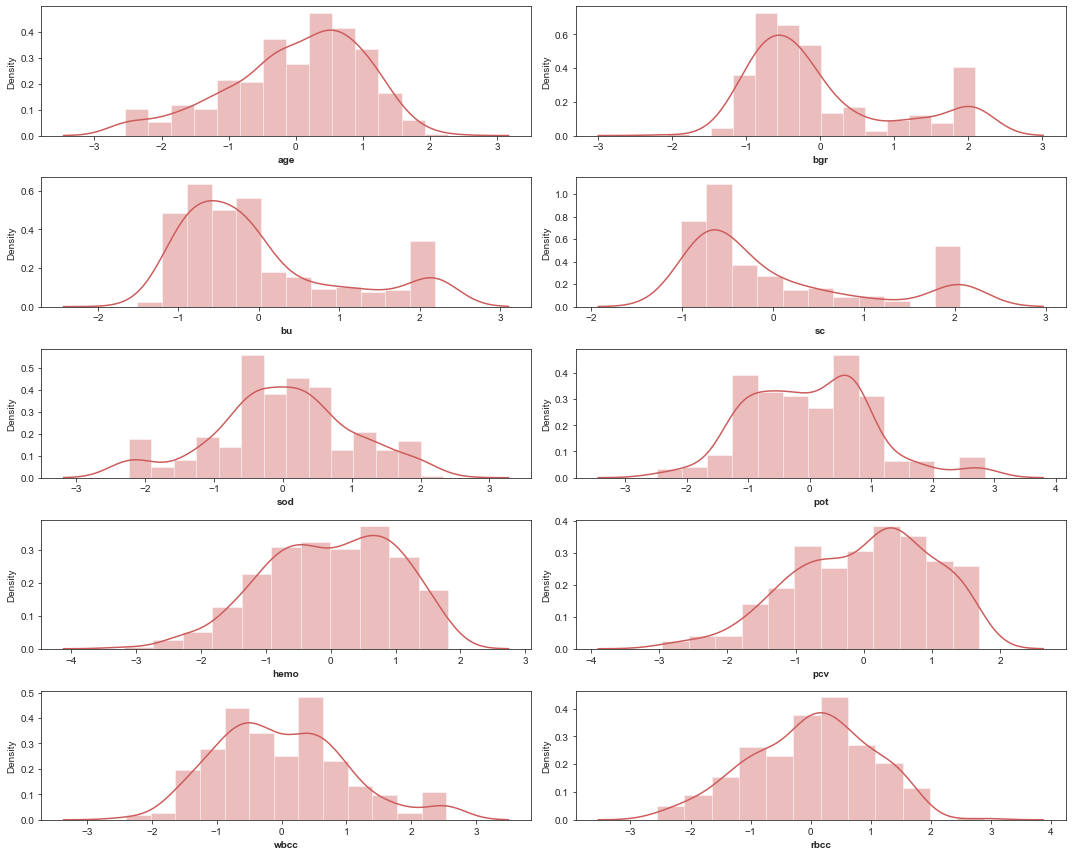

In [30]:
# distribution of data before scaling
plt.figure(figsize=(15, 12))
for i, col in enumerate(continuous_features):
    plt.subplot(5, 2, i+1)
    sns.distplot(x=X_scaled[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

### Imputing Null values

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from statistics import mean, stdev
results=[]
# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
strategies = [str(i) for i in [1,3,5,7,9,11,13,15]]
for s in strategies:
    pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', LogisticRegression())])
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X_scaled, y, scoring='accuracy', cv=cv, n_jobs=-1)
    results.append(scores)
    print('n_neighbors= %s || accuracy (%.4f)' % (s , mean(scores)))

n_neighbors= 1 || accuracy (0.9842)
n_neighbors= 3 || accuracy (0.9875)
n_neighbors= 5 || accuracy (0.9867)
n_neighbors= 7 || accuracy (0.9867)
n_neighbors= 9 || accuracy (0.9858)
n_neighbors= 11 || accuracy (0.9858)
n_neighbors= 13 || accuracy (0.9867)
n_neighbors= 15 || accuracy (0.9858)


* n_neighbors = 3 (k value) has highest accuracy

In [32]:
imputer = KNNImputer(n_neighbors=3)
X_scaled = imputer.fit_transform(X_scaled)

## Handling Imbalanced Dataset

* Handling Imbalanced Target Variable.
* Synthetic Minority Oversampling Technique or SMOTE is another technique to oversample the dataset.

In [33]:
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.over_sampling import KMeansSMOTE

# Resampling the minority class. The strategy can be changed as required.
smt = KMeansSMOTE(random_state=12)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_scaled, y)

## Train Test Split

* The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

* It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms.

In [34]:
from sklearn.model_selection import train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.3,random_state=21)
X_train.shape, X_test.shape

((350, 24), (150, 24))

## Model Selection
* **Here should understand the Various Classification models with default values from these models we can choose top 4 with Highest Accuracy score and proceed with HyperParameter Tuning**

**Import Required packages for model trainin**

In [35]:
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [36]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
     "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc

    print(list(models.keys())[i])
      
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Random Forest
----------------------------------
Model performance for Test set
- Accuracy: 0.9933
- F1 score: 0.9933
- Precision: 0.9859
- Recall: 1.0000
- Roc Auc Score: 0.9938


Decision Tree
----------------------------------
Model performance for Test set
- Accuracy: 0.9800
- F1 score: 0.9800
- Precision: 0.9589
- Recall: 1.0000
- Roc Auc Score: 0.9813


Gradient Boosting
----------------------------------
Model performance for Test set
- Accuracy: 0.9800
- F1 score: 0.9800
- Precision: 0.9589
- Recall: 1.0000
- Roc Auc Score: 0.9813


Logistic Regression
----------------------------------
Model performance for Test set
- Accuracy: 0.9800
- F1 score: 0.9800
- Precision: 0.9589
- Recall: 1.0000
- Roc Auc Score: 0.9813


K-Neighbors Classifier
----------------------------------
Model performance for Test set
- Accuracy: 0.9467
- F1 score: 0.9467
- Precision: 0.8974
- Recall: 1.0000
- Roc Auc Score: 0.9500


XGBClassifier
----------------------------------
Model performance for Test 

**Results of All Models**

| Model Name      | Accuracy |
| ----------- | ----------- |
| Random Forest | 0.9933       |
|XGBClassifier   | 0.9870        |
| AdaBoost Classifier   | 0.9800        |
| CatBoosting Classifier   | 0.9800        |
| Decision Tree   | 0.9800        |
| Gradient Boosting   | 0.9800        |
| Logistic Regression   | 0.9800        |
| Support Vector Classifier   | 0.9733        |
| K-Neighbors Classifier   | 0.9467        |

###  We can use cross validation score for further evaluation.

Cross-validation is a statistical method used to estimate the accuracy of machine learning models. It is used to protect against overfitting in a predictive model, particularly in a case where the amount of data may be limited.

Stratified kfold cross validation is an extension of regular kfold cross validation but specifically for classification problems where rather than the splits being completely random, the ratio between the target classes is the same in each fold as it is in the full dataset.

## Hyperopt: Distributed Hyperparameter Optimization

* Hyperopt is a powerful python library for hyperparameter optimization developed by James Bergstra. Hyperopt uses a form of Bayesian optimization for parameter tuning that allows you to get the best parameters for a given model.
* Grid Search is exhaustive in case of Resources usage.
* Random Search, is random, so could miss the most important values. However, there is a superior method available through the Hyperopt package

**Search space is where Hyperopt really gives you a many of sampling options:**

* for categorical parameters you have hp.choice
* for integers you get hp.randit, hp.quniform, hp.qloguniform and hp.qlognormal
* for floats we have hp.normal,  hp.uniform, hp.lognormal and hp.loguniform
* It is the most extensive sampling functionality out there.

You define your search space before you run optimization but you can create very complex parameter spaces:

In [38]:
from hyperopt import tpe,hp,Trials,space_eval
from hyperopt.fmin import fmin
from hyperopt.pyll import scope

**This is a function to minimize that receives hyperparameters values as input from the search space and returns the loss**

In [39]:
def rf_objective(params):
    model=RandomForestClassifier(**params, n_jobs=-1)
    acc = cross_val_score(model, X_res, y_res, scoring="accuracy").mean()
    return -acc

* As hyperopt minimizes the function, that why negative sign in the accuracy. so that we get best accuracy as objective

In [41]:
# Define the paramters
params={'n_estimators':hp.randint('n_estimators',100,500),
        'max_depth':hp.randint('max_depth',5,40),
        'min_samples_leaf':hp.randint('min_samples_leaf',2,10),
        'min_samples_split':hp.randint('min_samples_split',2,10),
        'criterion':hp.choice('criterion',['gini','entropy']),    
        'max_features':hp.choice('max_features',['sqrt', 'log2']),
       }

rf_trials = Trials()

# Using Fmin function to get best rf_objective
best_rf= fmin(
    fn=rf_objective,
    space=params,
    algo=tpe.suggest,
    trials=rf_trials,
    max_evals=100,
    rstate=np.random.default_rng()
)

100%|█████████████████████████████████████████████| 100/100 [01:43<00:00,  1.03s/trial, best loss: -0.9940000000000001]


In [42]:
best_rf

{'criterion': 0,
 'max_depth': 33,
 'max_features': 0,
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 277}

**Xgboost Classifier Hyperparamter tuning**

In [43]:
def xgb_objective(params):
    model=XGBClassifier(**params, n_jobs=-1)
    acc = cross_val_score(model, X_res, y_res, scoring="accuracy").mean()
    return -acc

In [44]:
# Define the paramters
xgboost_params = {"learning_rate": hp.choice('learning_rate',[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]),
              "max_depth": hp.randint('max_depth',5,40),
              "n_estimators": hp.randint('n_estimators',100,500),
              "colsample_bytree": hp.uniform("colsample_bytree",0,1),
              "seed":42
                }

xgb_trails =Trials()

# Using Fmin function to get best xgb_objective
best_xgb= fmin(
    fn=xgb_objective,
    space=xgboost_params,
    algo=tpe.suggest,
    trials=xgb_trails,
    max_evals=100,
    rstate=np.random.default_rng()
)

100%|█████████████████████████████████████████████| 100/100 [00:35<00:00,  2.82trial/s, best loss: -0.9940000000000001]


In [45]:
best_xgb

{'colsample_bytree': 0.27137482068126373,
 'learning_rate': 2,
 'max_depth': 15,
 'n_estimators': 235}

In [ ]:
xgb_trails.

* `xgb_trails.trails` can be used to check all trail evaluation which has been during hyper paramter tuning.
* `xgb_trails.best_trail` can be used to check best trail. which has given best accuracy.

**Stratified K-fold Cross Validation Technique on 2 algorithm to know the exact Mean CV accuracy score**

In [87]:
from sklearn.model_selection import cross_val_score,StratifiedKFold
skfold = StratifiedKFold(n_splits=5)

In [88]:
rf_cv_result = cross_val_score(RandomForestClassifier(criterion= 'gini', max_depth= 33, 
                                                      max_features= 'sqrt', min_samples_leaf= 2,
                                                      min_samples_split= 8 ,n_estimators= 277),
                                                      X_res, y_res, cv=skfold,scoring="accuracy",n_jobs=-1
                              )

rf_cv = rf_cv_result.mean()*100
print('Random Forest Classifier CV Mean Accuarcy Score is {}'.format(rf_cv))

Random Forest Classifier CV Mean Accuarcy Score is 99.4


In [89]:
xgb_cv_result = cross_val_score(XGBClassifier(colsample_bytree=0.27137482068126373,learning_rate=0.01,
                                              max_depth=15, n_estimators=235, seed=42), X_res, y_res, cv=skfold,
                                              scoring="accuracy",n_jobs=-1
                               )

xgb_cv = xgb_cv_result.mean()*100
print('XGB Classifier CV Mean Accuarcy Score is {}'.format(xgb_cv))

XGB Classifier CV Mean Accuarcy Score is 99.4


| Model Name      | Cross_val_score |
| ----------- | ----------- |
| Random Forest | 99.40%       |
|XGBClassifier   | 99.40%        |

### Best Model is Random Forest Classifier and Xgboost Classifier with 99.40 % in Cross validation